# Convolutional Neural Net and ResNet50V2 Modeling
In this notebook we create our first predictive model and evaluate our performance.

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.resnet_v2 import ResNet50V2

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# All images will be rescaled by 1./255


batch_size = 32
epoch_num = 10
img_directory = '../images/incoming_images/'

gen = ImageDataGenerator(rescale=1./255,
                         validation_split=0.20)

train_generator = gen.flow_from_directory(img_directory,
                                subset='training',
                                class_mode='categorical',
                                batch_size= batch_size,
                                target_size=(244, 244))

val_generator = gen.flow_from_directory(img_directory,
                                subset='validation',
                                class_mode='categorical',
                                batch_size= batch_size,
                                target_size=(244, 244))


Found 669 images belonging to 5 classes.
Found 166 images belonging to 5 classes.


In [23]:
# All images will be rescaled by 1./255
train_val_datagen = ImageDataGenerator(rescale=1./255,
                                       validation_split=0.20)

In [24]:
train_generator = train_val_datagen.flow_from_directory('../images/incoming_images/',
                                                        subset='training',
                                                        class_mode='categorical',
                                                        batch_size=32,
                                                        target_size=(244, 244))

val_generator = train_val_datagen.flow_from_directory('../images/incoming_images/',
                                                       subset='validation',
                                                       class_mode='categorical',
                                                       batch_size=32,
                                                       target_size=(244, 244))

Found 669 images belonging to 5 classes.
Found 166 images belonging to 5 classes.


In [46]:
model = Sequential()
model.add(ResNet50V2(include_top=False,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=(244, 244, 3),
                   pooling=None))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 8, 8, 2048)        23564800  
_________________________________________________________________
flatten_5 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               67109376  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n / batch_size,
                              epochs=epoch_num,
                              validation_data=val_generator,
                              validation_steps=val_generator.n / batch_size,
                              verbose=1)

Epoch 1/10
 3/20 [===>..........................] - ETA: 5:55 - loss: 8.6947 - acc: 0.2188

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/20 [==============================] - 306s 15s/step - loss: 3.1011 - acc: 0.4933 - val_loss: 52.6096 - val_acc: 0.2108
Epoch 2/10
21/20 [==============================] - 279s 13s/step - loss: 1.0196 - acc: 0.7190 - val_loss: 10.6816 - val_acc: 0.3133
Epoch 3/10
21/20 [==============================] - 292s 14s/step - loss: 0.9815 - acc: 0.7414 - val_loss: 2.6168 - val_acc: 0.2831
Epoch 4/10
21/20 [==============================] - 289s 14s/step - loss: 0.7331 - acc: 0.7922 - val_loss: 23.9634 - val_acc: 0.2410
Epoch 5/10
21/20 [==============================] - 294s 14s/step - loss: 0.9046 - acc: 0.7818 - val_loss: 1559.2590 - val_acc: 0.1687
Epoch 6/10
21/20 [==============================] - 290s 14s/step - loss: 1.9303 - acc: 0.6756 - val_loss: 41546.8957 - val_acc: 0.2229
Epoch 7/10
21/20 [==============================] - 284s 14s/step - loss: 3.6439 - acc: 0.3572 - val_loss: 12032142521.0602 - val_acc: 0.2229
Epoch 8/10
21/20 [==============================] - 290s 14s/step -

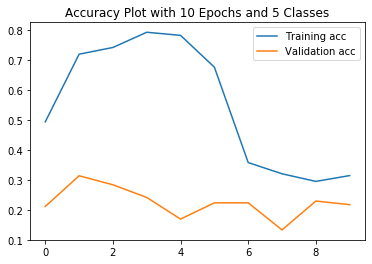

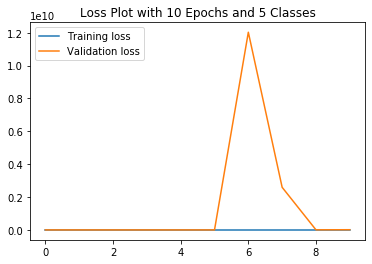

<Figure size 432x288 with 0 Axes>

In [49]:
title = f"Accuracy Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes"
plt.plot(history.history['acc'], label = 'Training acc')
plt.plot(history.history['val_acc'], label = 'Validation acc')
plt.title(title)
plt.legend()
plt.show()
plt.savefig(f'../exec_summary_images/{title}');

title = f"Loss Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes"
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title(title)
plt.legend()
plt.show()
plt.savefig(f'../exec_summary_images/{title}');

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
poses = os.listdir('../images/incoming_images/')

In [ ]:
generator = train_generator
preds = model.predict_generator(generator)

y_true = generator.classes

y_preds = [np.argmax(pred) for pred in preds]

con_mat = confusion_matrix(y_true, y_preds)
plot_mat = [[item/np.sum(row) for item in row] for row in con_mat]

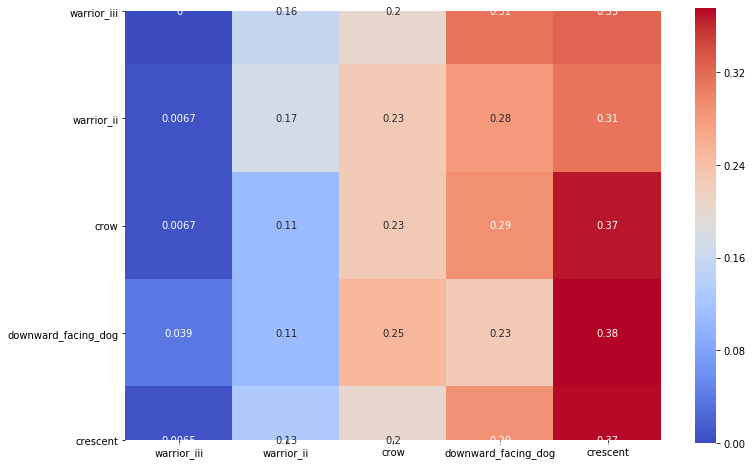

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(plot_mat,
            xticklabels=poses, 
            yticklabels=poses, 
            annot=True,
            square=True,
            vmin=0,
#             vmax=1,
            cmap='coolwarm');

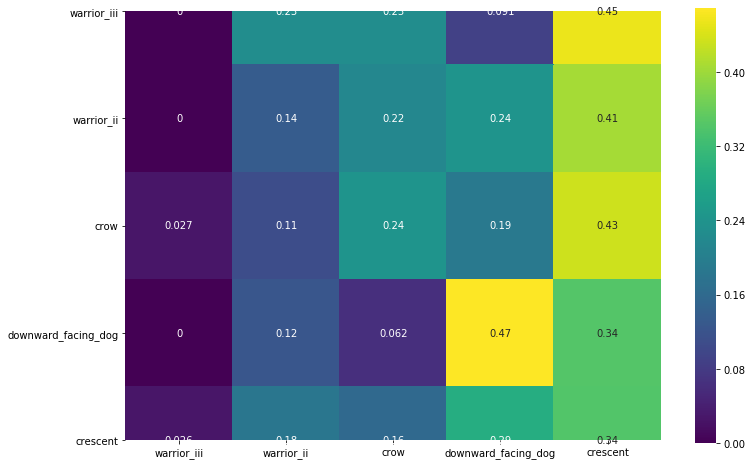

In [43]:
generator = val_generator
preds = model.predict_generator(generator)

y_true = generator.classes

y_preds = [np.argmax(pred) for pred in preds]

con_mat = confusion_matrix(y_true, y_preds)
plot_mat = [[item/np.sum(row) for item in row] for row in con_mat]

plt.figure(figsize=(12,8))
sns.heatmap(plot_mat,
            xticklabels=poses, 
            yticklabels=poses, 
            annot=True,
            square=True,
            vmin=0,
#             vmax=1,
            cmap='viridis');

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(244,244,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [45]:
model.save('../models/resnet_10_epochs.h5')

In [44]:
model_rn = Sequential()
model_rn.add(ResNet50V2(include_top=False,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=(244, 244, 3),
                   pooling=None))
model_rn.add(Flatten())
model_rn.add(Dense(512, activation='relu'))
model_rn.add(Dense(10, activation='softmax'))

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(244,244,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [45]:
model_rn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [46]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [47]:
history_rn = model_rn.fit_generator(train_generator,
                                 steps_per_epoch=36,
                                 epochs=10,
                                 validation_data=val_generator,
                                 validation_steps=9,
                                 verbose=1)

Epoch 1/10


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 6/36 [====>.........................] - ETA: 8:13 - loss: 20.8468 - acc: 0.1771

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 19. Skipping tag 36867
  " Skipping tag %s" % (size, len(data), tag)


36/36 [==============================] - 495s 14s/step - loss: 5.1685 - acc: 0.3416 - val_loss: 154.8274 - val_acc: 0.1338
Epoch 2/10
36/36 [==============================] - 477s 13s/step - loss: 1.4251 - acc: 0.5694 - val_loss: 20.6565 - val_acc: 0.3028
Epoch 3/10
36/36 [==============================] - 498s 14s/step - loss: 0.9347 - acc: 0.7269 - val_loss: 13.2011 - val_acc: 0.2324
Epoch 4/10
36/36 [==============================] - 492s 14s/step - loss: 0.5911 - acc: 0.8310 - val_loss: 5.1953 - val_acc: 0.5211
Epoch 5/10
36/36 [==============================] - 480s 13s/step - loss: 0.7999 - acc: 0.8075 - val_loss: 7.8923 - val_acc: 0.2676
Epoch 6/10
36/36 [==============================] - 459s 13s/step - loss: 1.1435 - acc: 0.7073 - val_loss: 40.1069 - val_acc: 0.1725
Epoch 7/10
 8/36 [=====>........................] - ETA: 5:35 - loss: 0.7532 - acc: 0.7812

KeyboardInterrupt: 

In [ ]:
model.save('./cnn_2.h5')

In [ ]:
plt.plot(history_rn.history['acc'], label = 'ResNetV2 Training acc',)
plt.plot(history_rn.history['val_acc'], label = 'ResNetV2 Validation acc')
plt.title("ResNet50V2 Accuracy Plot with 10 epochs and 10 Classes")
plt.legend();


In [ ]:
plt.plot(history_rn.history['loss'], label = 'ResNetV2 Training loss')
plt.plot(history_rn.history['val_loss'], label = 'ResNetV2 Validation loss')
plt.legend();

In [2]:
model = Sequential()